In [2]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [4]:
print(df)

                  FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]


In [5]:
df.head

<bound method NDFrame.head of                   FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]>

In [6]:
# check missing values
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


## Preparing the columns to train the model using Facebook Prophet


In [8]:
X = df.drop(['ElecPrice', 'GasPrice', 'SysLoad', 'Tmax'], axis=1)
y = df['ElecPrice']

In [ ]:
print(X)

                  FullDate
0      2010-09-01 00:00:00
1      2010-09-01 01:00:00
2      2010-09-01 02:00:00
3      2010-09-01 03:00:00
4      2010-09-01 04:00:00
...                    ...
92011  2021-02-28 19:00:00
92012  2021-02-28 20:00:00
92013  2021-02-28 21:00:00
92014  2021-02-28 22:00:00
92015  2021-02-28 23:00:00

[92016 rows x 1 columns]


In [ ]:
print(y)

0         23.710
1         22.635
2         22.565
3         18.910
4         18.030
          ...   
92011    117.925
92012     87.880
92013     62.060
92014     62.000
92015     62.955
Name: ElecPrice, Length: 92016, dtype: float64


In [9]:
# convert FullDtae column to datetime
df["FullDate"] =pd.to_datetime(df["FullDate"])
df.set_index("FullDate", inplace=True)


In [ ]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0, 0.5, 'ElecPrice')

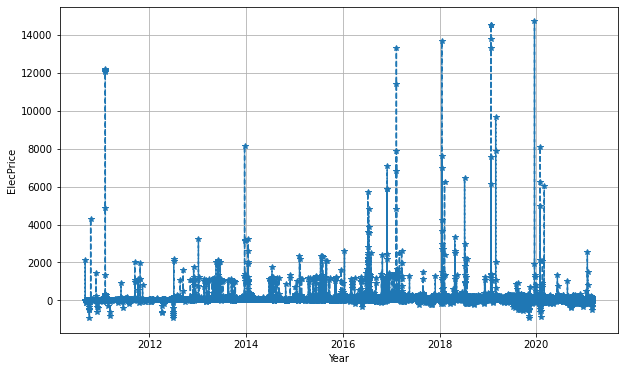

In [ ]:
# visualization of the univariate data(ElecPrice and Full date)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')


Text(0, 0.5, 'ElecPrice')

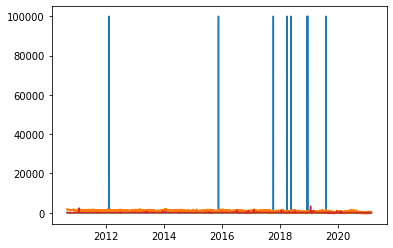

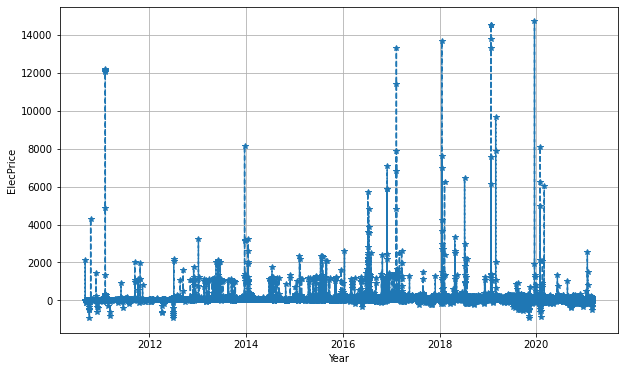

In [12]:
# Upsample to daily data points
df_daily = df.resample('D').mean()
plt.plot(df_daily);
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')


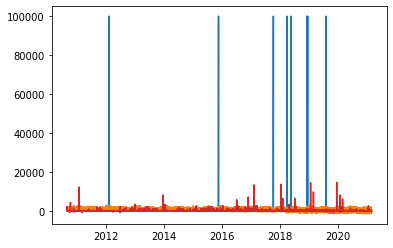

In [ ]:
# smoothing
df_MA = df.copy()
MA = df_MA['ElecPrice'].rolling(12).mean()
plt.plot(df_MA);

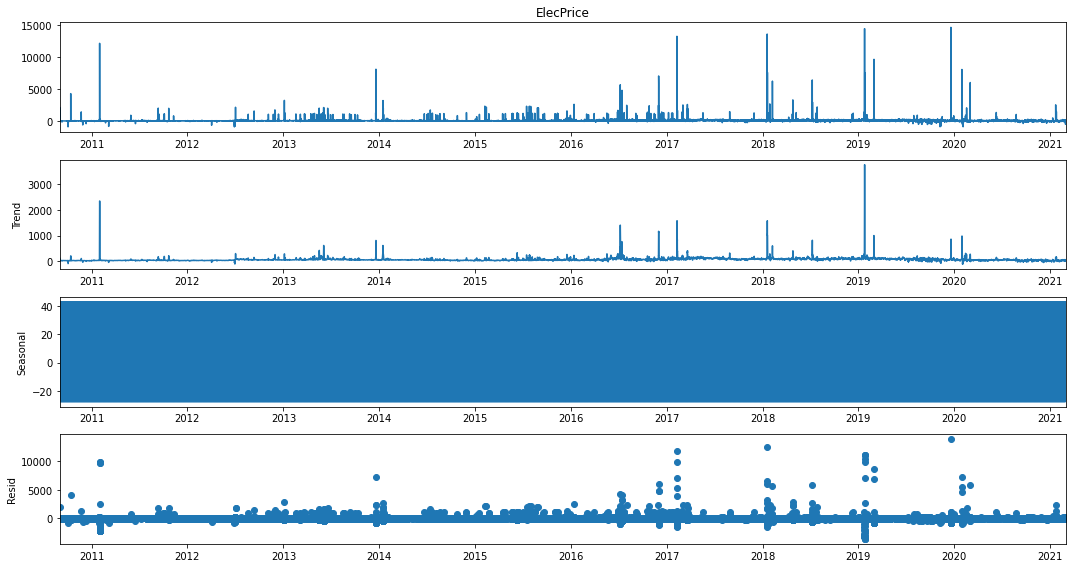

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

# The decomposed time series shows no notable increase in trend (only some spikes) and seasonality variations. Our initially plotted moving average on the last 12 months showed no notable change with time.that it varies with time. This suggest that the data is stationary.
We now perform an ADF to confirm this speculation

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of obsevations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'     {k} {v}')
  #results in


ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of obsevations used: 91962
Critical Values:
     1% -3.430421110703783
     5% -2.8615714297867108
     10% -2.56678672898094


# from the results obtained, the p-value, is less than 0.05 implying a stationary series.# We can now proceed with our model.

In [ ]:
 #split our data set into training and testing dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.97, random_state=1)

In [ ]:
df = df.rename(columns={'FullDate': 'ds',
                        'ElecPrice': 'y'})


In [ ]:
df.head()


,Tmax,SysLoad,GasPrice,y
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
# Define the model
model = Prophet()


In [ ]:
# fit the model
model.fit(df)

ValueError: ignored

In [13]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of obsevations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'     {k} {v}')
  #results in


ADF Statistic: -18.17067542641451
p-value: 2.4474966090684217e-30
No. of lags used: 67
No. of obsevations used: 91948
Critical Values:
     1% -3.430421121531399
     5% -2.861571434572286
     10% -2.566786731528145


In [15]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of obsevations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'     {k} {v}')
  #results in


ADF Statistic: -6.793388065452667
p-value: 2.3337605343636574e-09
No. of lags used: 48
No. of obsevations used: 91967
Critical Values:
     1% -3.430421106837576
     5% -2.86157142807793
     10% -2.566786728071412
